# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset],(http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

I chose to work on the "Scrubs" subreddit dataset as scrubs is the best.

In [5]:
import turicreate as tc 
import networkx as nx
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

/home/ise/anaconda3/envs/bigData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


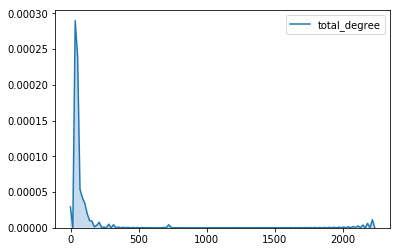

In [2]:
sg = tc.load_sgraph('./data/compress/Scrubs.2010-12-10.2016-10-31.sgraph')
degree = tc.degree_counting.create(sg)
sg.vertices['total_degree'] = degree['graph'].vertices['total_degree']
sg.vertices['in_degree'] = degree['graph'].vertices['in_degree']
sg.vertices['out_degree'] = degree['graph'].vertices['out_degree']
df= sg.vertices.sort("total_degree", ascending=False).to_dataframe()
x = pd.Series(df['total_degree'], name="total_degree")
sns.kdeplot(x, shade=True)

**Task 2:** Create a subgraph of the top-20 users according to the PageRank algorithm. Draw the subgraph (15pt)

In [12]:
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 11578                 |

| 2         | 3185.45               |

| 3         | 1188.69               |

| 4         | 592.085               |

| 5         | 342.803               |

| 6         | 234.736               |

| 7         | 171.197               |

| 8         | 128.72                |

| 9         | 98.6618               |

| 10        | 76.3074               |

| 11        | 59.4807               |

| 12        | 46.4643               |

| 13        | 36.4661               |

| 14        | 28.6461               |

| 15        | 22.5963               |

| 16        | 17.84                 |

| 17        | 14.1374               |

| 18        | 11.2123               |

| 19        | 8.92328               |

| 20        | 7.10857               |

+-----------+-----------------------+

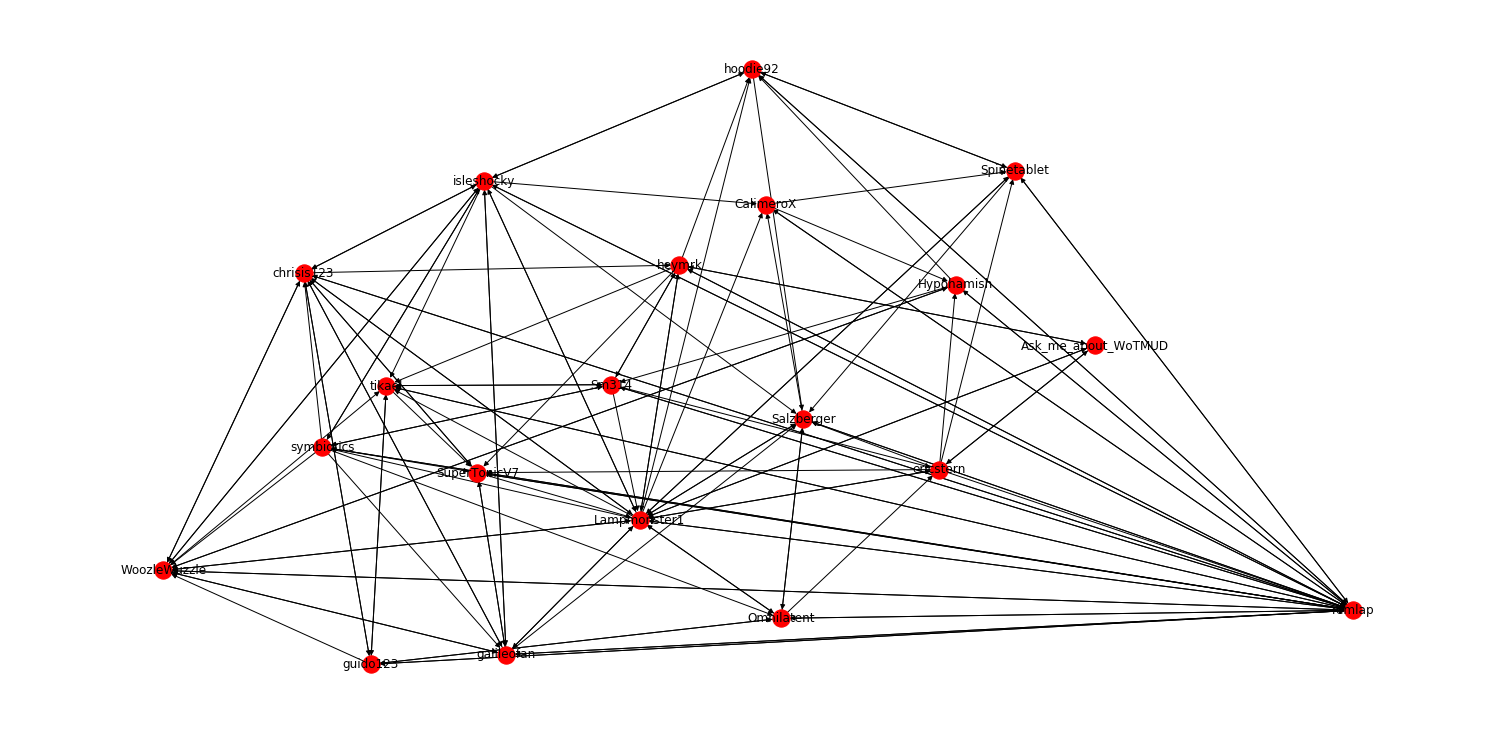

In [6]:
page_rank = tc.pagerank.create(sg)
top_20_page_rank = page_rank['pagerank'].sort('pagerank', ascending=False)[:20]
nx_graph = sgraph2nxgraph(sg)
nx_subgraph = nx_graph.subgraph(top_20_page_rank['__id']) 
plt.figure(figsize=(20,10))
nx.draw_kamada_kawai(nx_subgraph, with_labels=True)

**Task 3:** Calculate the degree, triangles, and average shortest path of each vertex in the graph (15pt)

In [105]:
sg = tc.load_sgraph('./data/compress/Scrubs.2010-12-10.2016-10-31.sgraph')
degree = tc.degree_counting.create(sg)
triangle = tc.triangle_counting.create(sg)
sg.vertices['total_degree'] = degree['graph'].vertices['total_degree']
sg.vertices['in_degree'] = degree['graph'].vertices['in_degree']
sg.vertices['out_degree'] = degree['graph'].vertices['out_degree']
sg.vertices['triangle_count'] = triangle['graph'].vertices['triangle_count']
avg_dist = []
for v in sg.vertices['__id']:
    short_path = tc.shortest_path.create(sg, source_vid=v)
    avg_dist.append(short_path['graph'].vertices['distance'].mean())
sg.vertices['avg_short_path'] = avg_dist   
sg.vertices.sort("avg_short_path", ascending=False)

Initializing vertex ids.

Removing duplicate (bidirectional) edges.

Counting triangles...

Finished in 0.755752 secs.

Total triangles in the graph : 5741

paulysdog


__id,mindate,maxdate,total_degree,in_degree,out_degree,triangle_count
jonnytylerterry,2013-08-11 22:40:33,2013-08-11 22:50:57,4,2,2,0
itsbobfg,2012-09-20 01:47:45,2015-05-22 15:46:37,7,2,5,0
HuntertheMaster,2012-12-28 19:27:50,2012-12-28 19:27:50,1,0,1,0
Pledge_Master,2013-11-06 20:42:05,2016-02-28 01:12:50,20,15,5,12
HeyZimbabwe,2013-08-20 03:31:29,2014-06-17 00:24:26,3,1,2,0
rule17,2014-06-06 09:32:56,2015-03-08 18:31:32,6,4,2,0
Redbaron36,2013-02-13 23:57:12,2013-02-13 23:57:12,0,0,0,0
gregclouds,2012-12-28 08:43:52,2012-12-28 08:43:52,0,0,0,0
Draikmage,2015-01-19 04:32:24,2015-01-19 04:32:24,0,0,0,0
Dalek1234,2015-05-23 23:51:22,2015-05-31 01:01:25,3,1,2,1


**Task 4:** Use Cytoscape to visualize the network, where each vertex size is correlates to its degree (15pt)

In [104]:
sg = tc.load_sgraph('./data/compress/Scrubs.2010-12-10.2016-10-31.sgraph')
degree = tc.degree_counting.create(sg)
sg.vertices['degree'] = degree['graph'].vertices['total_degree']
degree_df = degree['graph'].vertices.to_dataframe()

nodes = pd.DataFrame(data=degree_df[['__id', 'total_degree']],columns=['id', 'degree'])
edges = sg.edges.to_dataframe()
edges = pd.DataFrame(data=edges[['__src_id', '__dst_id', 'weight']],columns=['source', 'destination', 'weight'])
nodes.to_csv('nodes.csv')
edges.to_csv('edges.csv')

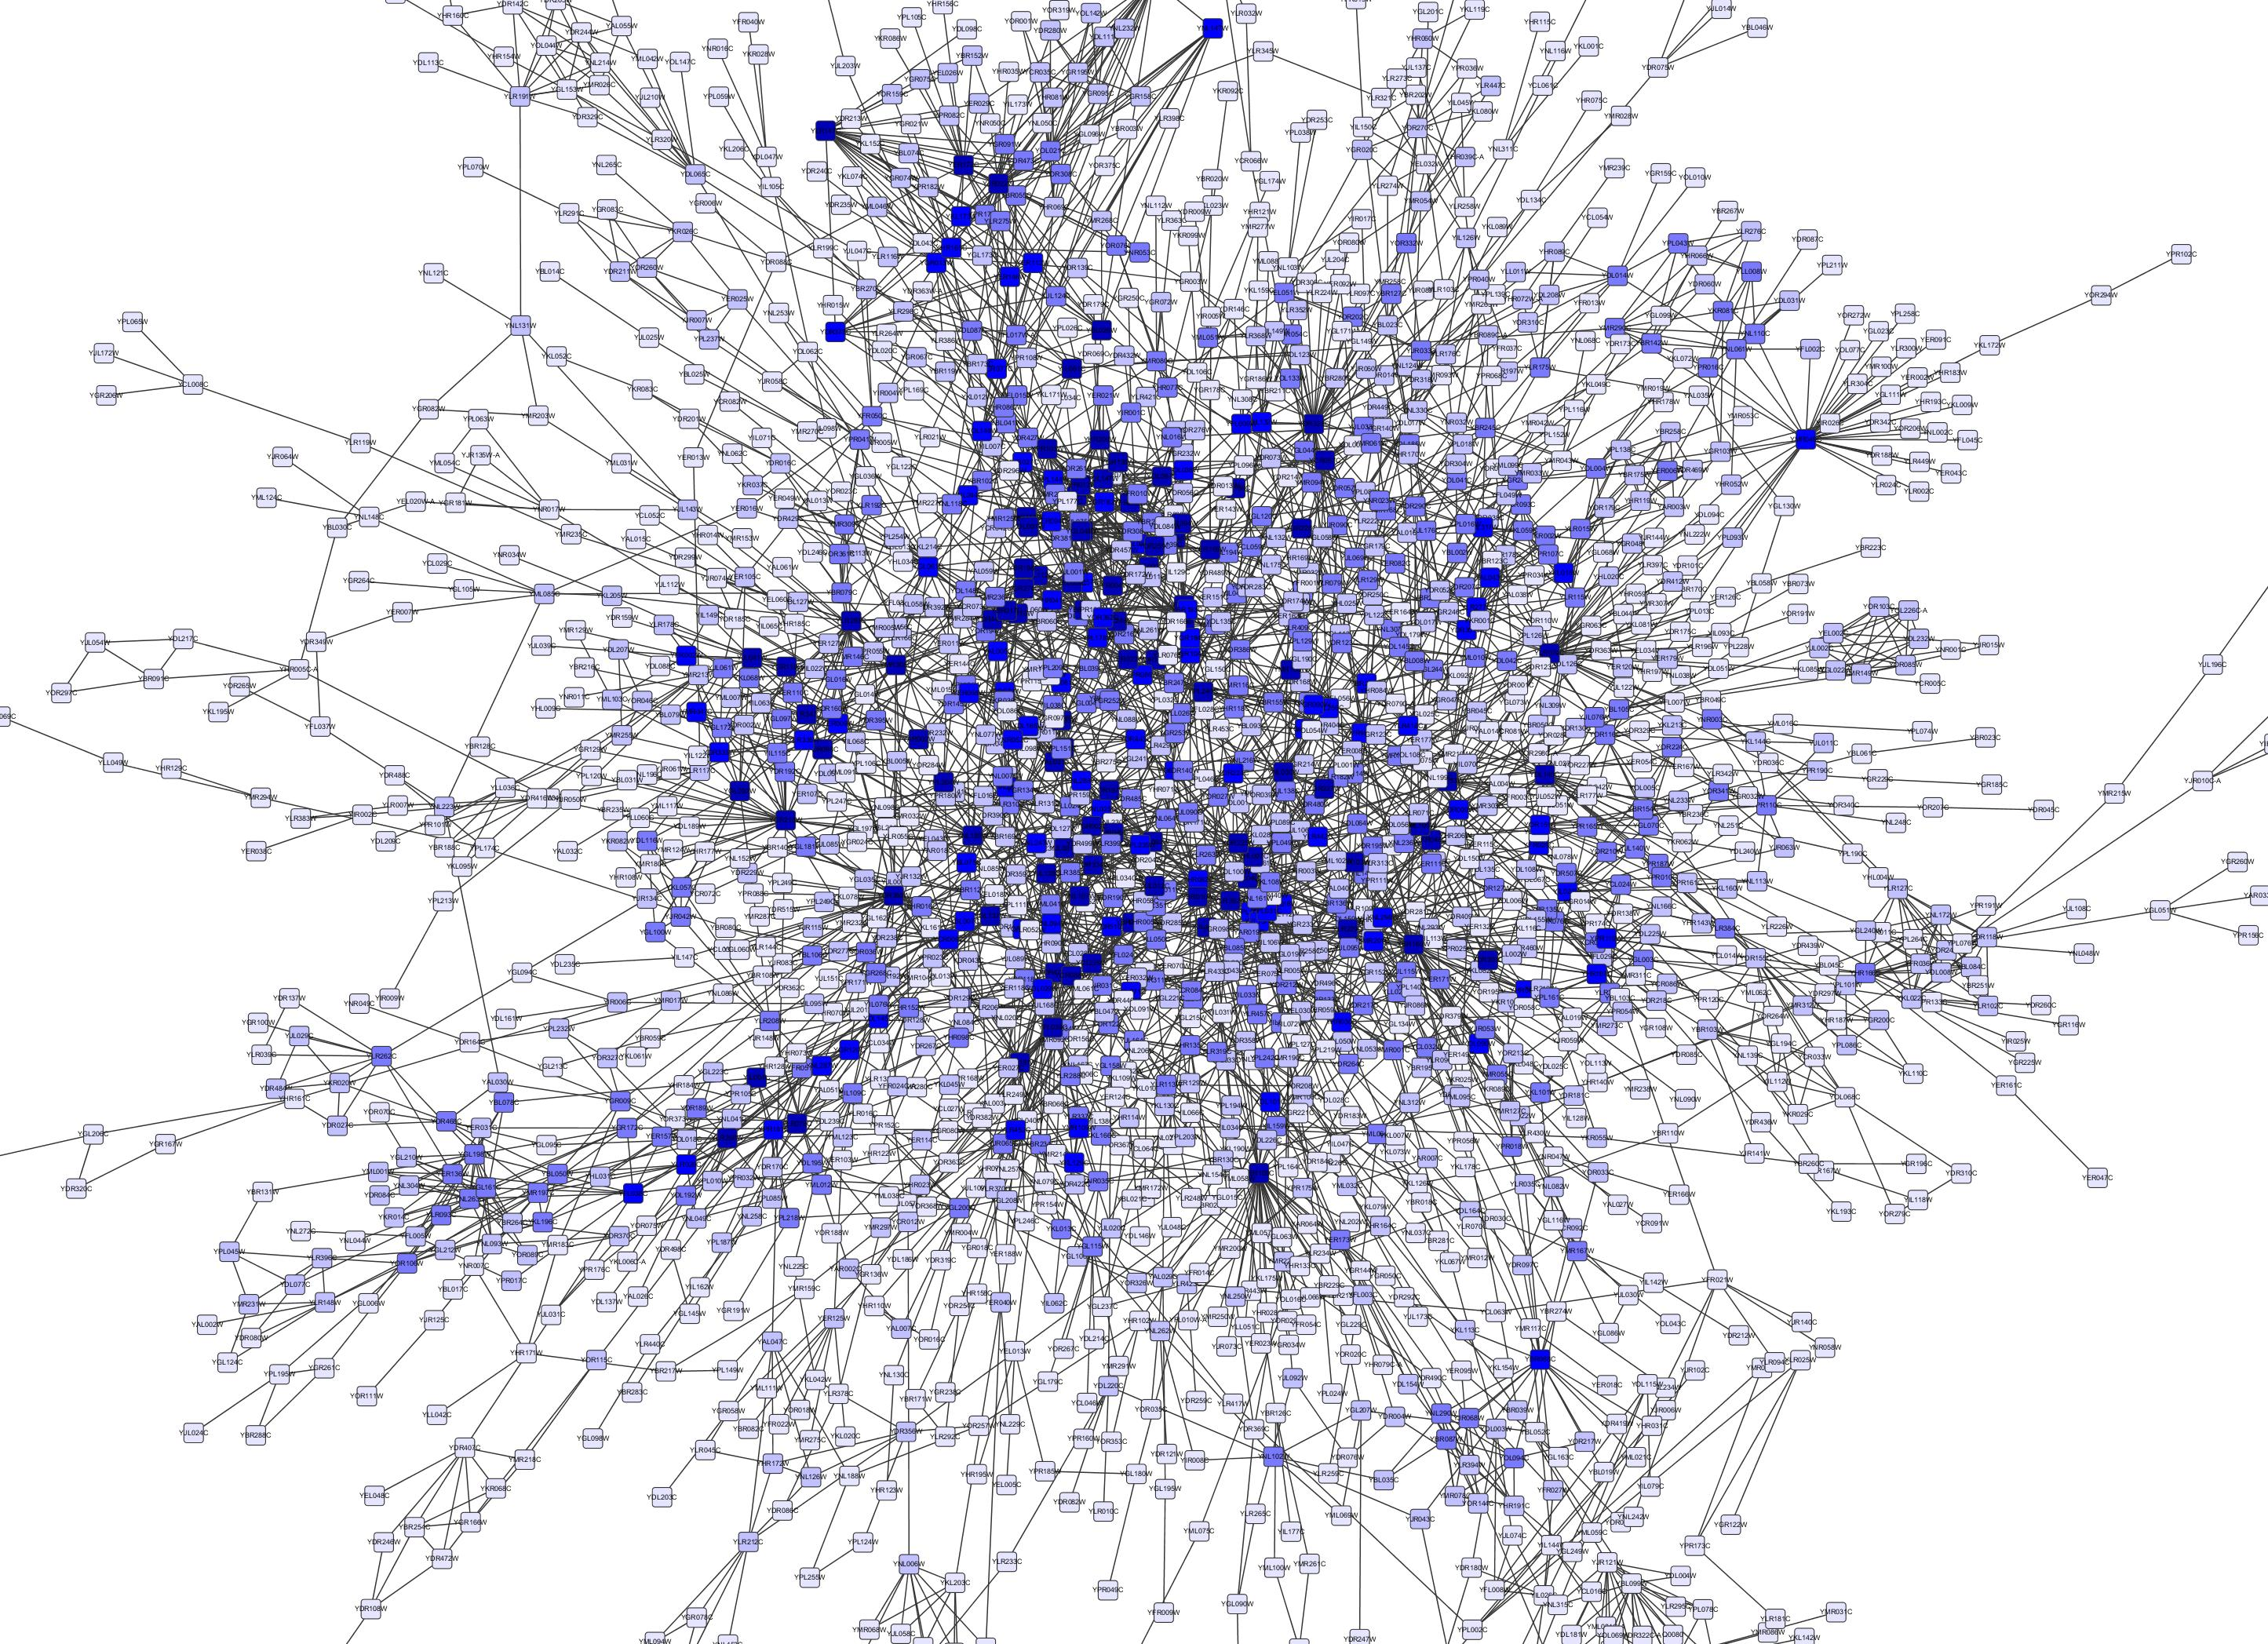

In [3]:
from IPython.display import Image
Image(filename='/data/home/laadan/BigData/Lecture 4/q4net.jpg')

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of edges in the subgraph (5pt)

There are 287 edges in the following subgraph:


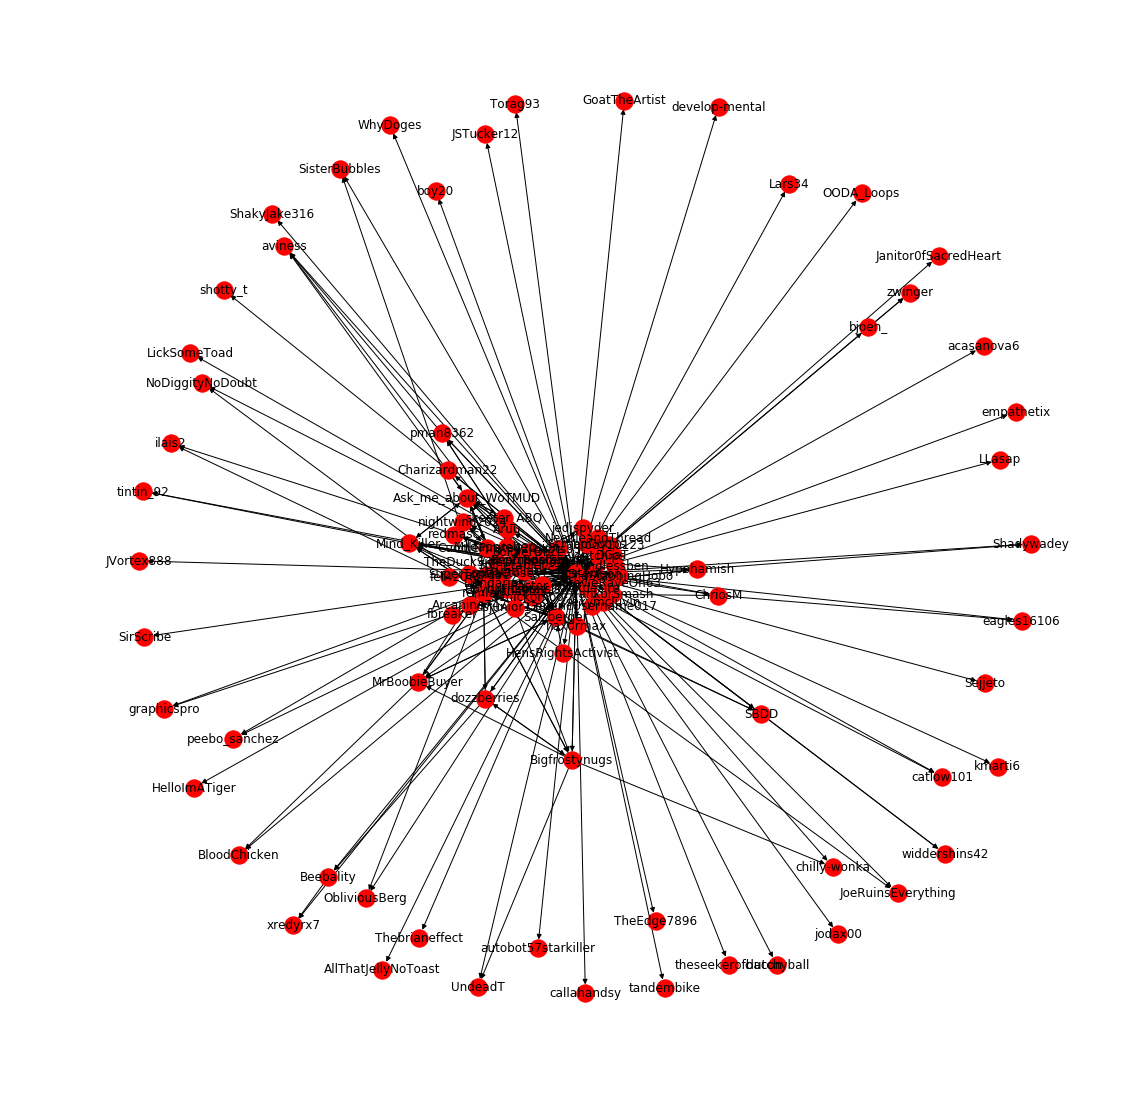

In [9]:
def sub_graph_for_vertex(v):
    sg = tc.load_sgraph('./data/compress/Scrubs.2010-12-10.2016-10-31.sgraph')
    nx_graph = sgraph2nxgraph(sg) 
    neighbors = list(nx_graph.neighbors(v))
    neighbors.append(v)
    sub_graph = nx_graph.subgraph(neighbors) 
    print(f"There are {sub_graph.number_of_edges()} edges in the following subgraph:")    
    plt.figure(figsize=(15,15))
    nx.draw_spring(sub_graph, with_labels=True)
sub_graph_for_vertex('ericstern')

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [6]:
edges = tc.load_sframe('../datasets/FCIS/fcis_chess.interactions.sframe')
vertices = tc.load_sframe('../datasets/FCIS/fcis_chess.vertices.sframe')
sg = tc.SGraph(vertices=vertices, edges=edges, vid_field='v_id', src_field='src_id', dst_field='dst_id')


Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 632166                |

| 2         | 180728                |

| 3         | 68816.1               |

| 4         | 37065.1               |

| 5         | 22362.9               |

| 6         | 14085.1               |

| 7         | 9275.28               |

| 8         | 6324.12               |

| 9         | 4374.45               |

| 10        | 3129.99               |

| 11        | 2241.2                |

| 12        | 1641.8                |

| 13        | 1201.78               |

| 14        | 891.069               |

| 15        | 660.813               |

| 16        | 493.889               |

| 17        | 369.505               |

| 18        | 277.958               |

| 19        | 209.503               |

| 20        | 158.656               |

+-----------+-----------------------+

Text(0, 0.5, 'page rank')

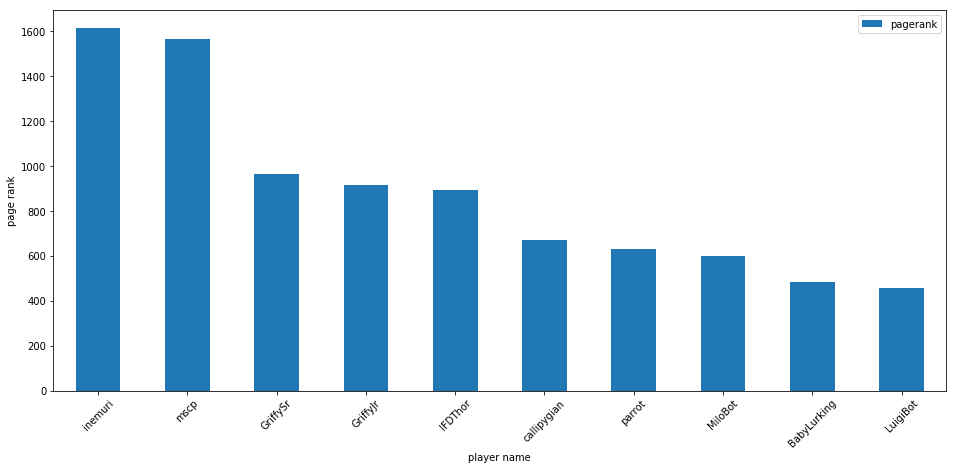

In [9]:
pagerank = tc.pagerank.create(sg)
pr_top_10 = pagerank['pagerank'].sort('pagerank', ascending=False)[:10]
df = pr_top_10.to_dataframe()
df = df[['__id', 'pagerank']]
ax = df.plot(kind='bar', figsize=(16,7))
ax.set_xticklabels(df['__id'], rotation=45)
ax.set_xlabel("player name")
ax.set_ylabel("page rank")

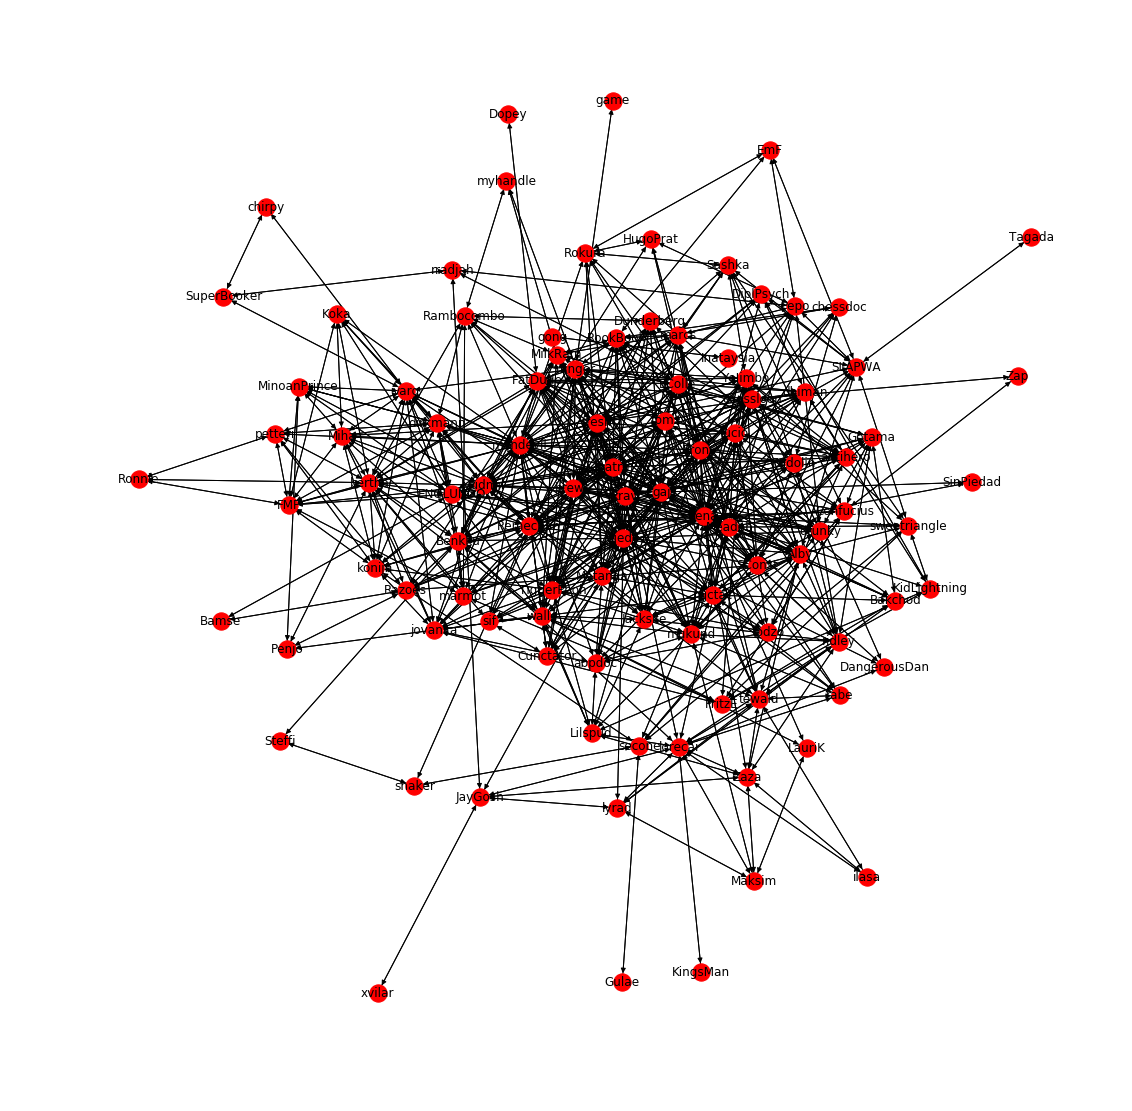

In [13]:
sub_sg = sg.get_neighborhood(vertices['v_id'][:100], 0, True)
ng = sgraph2nxgraph(sub_sg)
plt.figure(figsize=(15,15))
nx.draw_kamada_kawai(ng, with_labels=True)

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

As it say in the question. i went back to lecture 2 where we created the network and graph.
 saved the nodes and edges as csv files and then load them in cytoscape


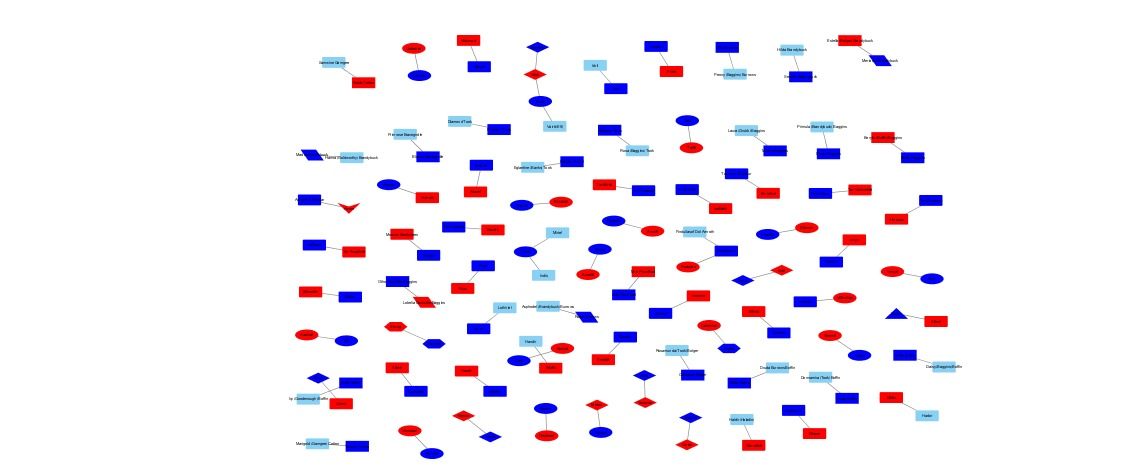

In [3]:
from IPython.display import Image
print('As it say in the question. i went back to lecture 2 where we created the network and graph.\n saved the nodes and edges as csv files and then load them in cytoscape')
Image(filename='lotrnet.jpeg') 